In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [9]:
df.to_csv("amazon.csv")

In [4]:
#from google.colab import files
#files.download("amazon.csv")

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [6]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [7]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [8]:
df=df.sample(400000) # Because our data is too much, we take a sample of 400k

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 1627901 to 468496
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      400000 non-null  object
 1   asin            400000 non-null  object
 2   reviewerName    394203 non-null  object
 3   helpful         400000 non-null  object
 4   reviewText      400000 non-null  object
 5   overall         400000 non-null  int64 
 6   summary         400000 non-null  object
 7   unixReviewTime  400000 non-null  int64 
 8   reviewTime      400000 non-null  object
dtypes: int64(2), object(7)
memory usage: 30.5+ MB


In [10]:
df.reset_index(drop=True,inplace=True) # reset our index after taking the samples

In [11]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A34PJAS16SWEES,B00DVB7F0S,David Delson,"[0, 0]",I am EXTREMELY impressed with this power pack....,5,Brilliant - charges lots of stuff PLUS runs yo...,1402012800,"06 6, 2014"
1,A3OR2YSRJ01FRF,B000I1KGKK,R. Gormley,"[0, 0]",I bought these on a flight from Australia to t...,5,Outstanding,1167177600,"12 27, 2006"
2,A17AK1Z8KN613L,B004GUT1QO,"G. Simms ""Ireadlots""","[0, 0]","I live with the buds in my ear, and a protecti...",4,Does What it Does Prety Well,1308528000,"06 20, 2011"
3,AQL3D70CKNTL8,B0042I3J1I,Charles Capko,"[0, 0]",I've been using this for a long while now. I u...,4,Could have a better design but too useful to g...,1356393600,"12 25, 2012"
4,A3LN1XP3RAA5RI,B00622AG6S,AMD,"[0, 0]","The product for its price does its Job, Have n...",5,It works a described.,1403136000,"06 19, 2014"


In [12]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
399995,A1925WP0C8AGLB,B000E8SY5Q,ice breakers,"[1, 1]",This item is exactly as illustrated and advert...,4,Good works!,1177632000,"04 27, 2007"
399996,A34D4ASUYV6D19,B005ZMHIJE,Amazon Customer,"[0, 0]",This silicone cover fits perfectly & still all...,5,Great little mp3 player cover,1365206400,"04 6, 2013"
399997,A3PVKXE8RDK0L7,B00G2J0XUA,Reynold Haywood,"[3, 3]",Always the best in laptop cant complain works ...,5,toshiba,1387929600,"12 25, 2013"
399998,A3FW472GT8OFQV,B00752QXZ2,Elizabeth M. Outt,"[25, 51]",picture of product looked larger than the actu...,2,too short,1361318400,"02 20, 2013"
399999,A31GJXMQZ0UMBD,B001G7PMNG,L. Ly,"[2, 8]","The filter is very nice, but I am having secon...",4,So far so good,1287619200,"10 21, 2010"


### NLP Text Processing

In [13]:
df["reviewText"][1]

"I bought these on a flight from Australia to the US and was instantly impressed. The adjustability is excellent, and can fit snugly around any size ear. But most important to me was the flexibility as to 'how deep' you can sit the buds - a particular concern for me as I have small openings, and most cause discomfort.Sound quality is fantastic - I'd recommend to anyone!"

In [14]:
df["reviewText"]=df["reviewText"].str.lower() # kücük harfe cevirdik
df["reviewText"]=df["reviewText"].str.replace('[^\w\s]','') # noktalama isaretlerini kaldirdik
df["reviewText"]=df["reviewText"].str.replace('\d+','') # rakamlari kaldirdik
df["reviewText"]=df["reviewText"].str.replace('\n',' ').replace('\r',' ') # enter ve return'lari kaldirdik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df["reviewText"][1]

'i bought these on a flight from australia to the us and was instantly impressed the adjustability is excellent and can fit snugly around any size ear but most important to me was the flexibility as to how deep you can sit the buds  a particular concern for me as i have small openings and most cause discomfortsound quality is fantastic  id recommend to anyone'

In [16]:
print(df["reviewText"].iloc[2]) # sample review after text processing

i live with the buds in my ear and a protective case for the ipod is a necessity ive tried several nonipod cases and this ranks highly though not at the top the fit is excellent and the opennings are where they need to be for the ipod access the tread feature on the back is useful to prevent movement  i had it perched on my car armrest and it did not move during highway drivingwhile it was connected to the ipod dockive had this for just a few days so i really cant respond to how well it will hold up especially if you have the urge to remove the ipod from this cover frequentlyothers to look at more expensive but offering more protection include products from belkin


#### Tokenize

In [17]:
#pip install nltk

In [18]:
import nltk

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import wordnet

In [21]:
sent_tokenize(df["reviewText"][0])

['i am extremely impressed with this power pack  superb quality build and the versatility is amazing  i have charged my cell phone and tablet with this plus   a huge bonus if you are a musician who uses pedals  this works great for powering your pedals away from a power source  it only has a single v outlet but that is no problem  just use a daisy chain connector  at first it wasnt working for my pedals but i finally realized it had to be a polarity issue so i tried a reverse polarity cable the voodoo cable with a red end and a black end and voila  a second issue was my eq pedal takes v but i bought a diago vv adapter and same result  perfection  so with this power pack a reverse polarity cable daisy chain and v adapter i can power my entire pedal board for hours on end  add to that being able to charge almost any device you can think of the adapters provided are plentiful and have worked for everything i have tried i think this is the most incredible and valuable power device you will

In [22]:
#word_tokenize(df["reviewText"][0])

In [23]:
TreebankWordTokenizer().tokenize(df["reviewText"][0])

['i',
 'am',
 'extremely',
 'impressed',
 'with',
 'this',
 'power',
 'pack',
 'superb',
 'quality',
 'build',
 'and',
 'the',
 'versatility',
 'is',
 'amazing',
 'i',
 'have',
 'charged',
 'my',
 'cell',
 'phone',
 'and',
 'tablet',
 'with',
 'this',
 'plus',
 'a',
 'huge',
 'bonus',
 'if',
 'you',
 'are',
 'a',
 'musician',
 'who',
 'uses',
 'pedals',
 'this',
 'works',
 'great',
 'for',
 'powering',
 'your',
 'pedals',
 'away',
 'from',
 'a',
 'power',
 'source',
 'it',
 'only',
 'has',
 'a',
 'single',
 'v',
 'outlet',
 'but',
 'that',
 'is',
 'no',
 'problem',
 'just',
 'use',
 'a',
 'daisy',
 'chain',
 'connector',
 'at',
 'first',
 'it',
 'wasnt',
 'working',
 'for',
 'my',
 'pedals',
 'but',
 'i',
 'finally',
 'realized',
 'it',
 'had',
 'to',
 'be',
 'a',
 'polarity',
 'issue',
 'so',
 'i',
 'tried',
 'a',
 'reverse',
 'polarity',
 'cable',
 'the',
 'voodoo',
 'cable',
 'with',
 'a',
 'red',
 'end',
 'and',
 'a',
 'black',
 'end',
 'and',
 'voila',
 'a',
 'second',
 'issue',
 

In [24]:
temp = df["reviewText"].values
tokenized = [corpus.split(" ") for corpus in temp]

print(tokenized[0])

['i', 'am', 'extremely', 'impressed', 'with', 'this', 'power', 'pack', '', 'superb', 'quality', 'build', 'and', 'the', 'versatility', 'is', 'amazing', '', 'i', 'have', 'charged', 'my', 'cell', 'phone', 'and', 'tablet', 'with', 'this', 'plus', '', '', 'a', 'huge', 'bonus', 'if', 'you', 'are', 'a', 'musician', 'who', 'uses', 'pedals', '', 'this', 'works', 'great', 'for', 'powering', 'your', 'pedals', 'away', 'from', 'a', 'power', 'source', '', 'it', 'only', 'has', 'a', 'single', 'v', 'outlet', 'but', 'that', 'is', 'no', 'problem', '', 'just', 'use', 'a', 'daisy', 'chain', 'connector', '', 'at', 'first', 'it', 'wasnt', 'working', 'for', 'my', 'pedals', 'but', 'i', 'finally', 'realized', 'it', 'had', 'to', 'be', 'a', 'polarity', 'issue', 'so', 'i', 'tried', 'a', 'reverse', 'polarity', 'cable', 'the', 'voodoo', 'cable', 'with', 'a', 'red', 'end', 'and', 'a', 'black', 'end', 'and', 'voila', '', 'a', 'second', 'issue', 'was', 'my', 'eq', 'pedal', 'takes', 'v', 'but', 'i', 'bought', 'a', 'diag

In [25]:
# Stemmer

In [26]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [27]:
PorterStemmer().stem(df["reviewText"][0])

'i am extremely impressed with this power pack  superb quality build and the versatility is amazing  i have charged my cell phone and tablet with this plus   a huge bonus if you are a musician who uses pedals  this works great for powering your pedals away from a power source  it only has a single v outlet but that is no problem  just use a daisy chain connector  at first it wasnt working for my pedals but i finally realized it had to be a polarity issue so i tried a reverse polarity cable the voodoo cable with a red end and a black end and voila  a second issue was my eq pedal takes v but i bought a diago vv adapter and same result  perfection  so with this power pack a reverse polarity cable daisy chain and v adapter i can power my entire pedal board for hours on end  add to that being able to charge almost any device you can think of the adapters provided are plentiful and have worked for everything i have tried i think this is the most incredible and valuable power device you will 

In [28]:
LancasterStemmer().stem(df["reviewText"][0])

'i am extremely impressed with this power pack  superb quality build and the versatility is amazing  i have charged my cell phone and tablet with this plus   a huge bonus if you are a musician who uses pedals  this works great for powering your pedals away from a power source  it only has a single v outlet but that is no problem  just use a daisy chain connector  at first it wasnt working for my pedals but i finally realized it had to be a polarity issue so i tried a reverse polarity cable the voodoo cable with a red end and a black end and voila  a second issue was my eq pedal takes v but i bought a diago vv adapter and same result  perfection  so with this power pack a reverse polarity cable daisy chain and v adapter i can power my entire pedal board for hours on end  add to that being able to charge almost any device you can think of the adapters provided are plentiful and have worked for everything i have tried i think this is the most incredible and valuable power device you will 

In [29]:
#POS - Part of Speech: Isim ill, özne yüklem, fill fail

In [ ]:
nltk.download("averaged_perceptron_tagger")

In [31]:
nltk.pos_tag(word_tokenize(df["reviewText"][0]))

[('i', 'NN'),
 ('am', 'VBP'),
 ('extremely', 'RB'),
 ('impressed', 'JJ'),
 ('with', 'IN'),
 ('this', 'DT'),
 ('power', 'NN'),
 ('pack', 'NN'),
 ('superb', 'NN'),
 ('quality', 'NN'),
 ('build', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('versatility', 'NN'),
 ('is', 'VBZ'),
 ('amazing', 'VBG'),
 ('i', 'NNS'),
 ('have', 'VBP'),
 ('charged', 'VBN'),
 ('my', 'PRP$'),
 ('cell', 'NN'),
 ('phone', 'NN'),
 ('and', 'CC'),
 ('tablet', 'NN'),
 ('with', 'IN'),
 ('this', 'DT'),
 ('plus', 'VBZ'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('bonus', 'NN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('musician', 'NN'),
 ('who', 'WP'),
 ('uses', 'VBZ'),
 ('pedals', 'NNS'),
 ('this', 'DT'),
 ('works', 'VBZ'),
 ('great', 'JJ'),
 ('for', 'IN'),
 ('powering', 'VBG'),
 ('your', 'PRP$'),
 ('pedals', 'NNS'),
 ('away', 'RB'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('power', 'NN'),
 ('source', 'NN'),
 ('it', 'PRP'),
 ('only', 'RB'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('single', 'JJ'),
 ('v', 'NN'),
 ('outlet', 'N

In [32]:
#!pip install autocorrect

In [33]:
from autocorrect import spell

In [34]:
spell(df["reviewText"][0])

autocorrect.spell is deprecated,             use autocorrect.Speller instead


'i am extremely impressed with this power pack  superb quality build and the versatility is amazing  i have charged my cell phone and tablet with this plus   a huge bonus if you are a musician who uses pedals  this works great for powering your pedals away from a power source  it only has a single v outlet but that is no problem  just use a daisy chain connector  at first it wasnt working for my pedals but i finally realized it had to be a polarity issue so i tried a reverse polarity cable the voodoo cable with a red end and a black end and viola  a second issue was my eq pedal takes v but i bought a diego vv adapter and same result  perfection  so with this power pack a reverse polarity cable daisy chain and v adapter i can power my entire pedal board for hours on end  add to that being able to charge almost any device you can think of the adapters provided are plentiful and have worked for everything i have tried i think this is the most incredible and valuable power device you will 

In [35]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A34PJAS16SWEES,B00DVB7F0S,David Delson,"[0, 0]",i am extremely impressed with this power pack ...,5,Brilliant - charges lots of stuff PLUS runs yo...,1402012800,"06 6, 2014"
1,A3OR2YSRJ01FRF,B000I1KGKK,R. Gormley,"[0, 0]",i bought these on a flight from australia to t...,5,Outstanding,1167177600,"12 27, 2006"
2,A17AK1Z8KN613L,B004GUT1QO,"G. Simms ""Ireadlots""","[0, 0]",i live with the buds in my ear and a protectiv...,4,Does What it Does Prety Well,1308528000,"06 20, 2011"
3,AQL3D70CKNTL8,B0042I3J1I,Charles Capko,"[0, 0]",ive been using this for a long while now i use...,4,Could have a better design but too useful to g...,1356393600,"12 25, 2012"
4,A3LN1XP3RAA5RI,B00622AG6S,AMD,"[0, 0]",the product for its price does its job have no...,5,It works a described.,1403136000,"06 19, 2014"


In [36]:
df.overall.value_counts()

5    238977
4     82001
3     33552
1     26005
2     19465
Name: overall, dtype: int64

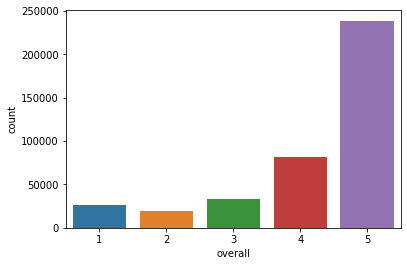

In [37]:
sns.countplot(x=df["overall"]);

In [38]:
# adding sentiment Features
df["sentiment"]=df["overall"].map({5:"positive",4:"positive",3:"neutral",2:"negative",1:"negative"})

In [39]:
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
391217,A1XHS2AW2S7LS9,B00DR0PDNE,Jeffrey Bugbee,"[0, 0]",neat device we use primarily to stream music a...,4,"Recommended, with reservations",1390262400,"01 21, 2014",positive
335519,A2WG3BJM948CWV,B000V9D5LG,philip,"[0, 0]",i mostly use this lens for video because im a ...,5,Love this lens!,1386288000,"12 6, 2013",positive
173741,ANMB89ON8576X,B0038KTAXW,T. J. Mathews,"[0, 0]",this case is just what i was looking for it is...,5,Just what I needed,1285113600,"09 22, 2010",positive
362283,A1ETF073IG978T,B000KFYD9E,"Michele Hermansen ""gengonushi""","[0, 0]",nice price option to the apple product well ma...,5,Great Cozies!,1359676800,"02 1, 2013",positive
218122,A2Y7Q9NAZ3D2W0,B003EM0RM2,philip_ng,"[0, 0]",was not impressed with the bass on this earpie...,3,Bass is not strong but overall OK!,1358726400,"01 21, 2013",neutral


In [40]:
#en iyi ve en kötü
dfsent=df[(df.overall==5) | (df.overall==1)]

In [41]:
dfsent.reset_index(drop=True,inplace=True)  # artik 1 den baslayip sona gidiyor

### Classification - Overall: will the user give 5 or 1 rating

In [42]:
dfsent

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A34PJAS16SWEES,B00DVB7F0S,David Delson,"[0, 0]",i am extremely impressed with this power pack ...,5,Brilliant - charges lots of stuff PLUS runs yo...,1402012800,"06 6, 2014",positive
1,A3OR2YSRJ01FRF,B000I1KGKK,R. Gormley,"[0, 0]",i bought these on a flight from australia to t...,5,Outstanding,1167177600,"12 27, 2006",positive
2,A3LN1XP3RAA5RI,B00622AG6S,AMD,"[0, 0]",the product for its price does its job have no...,5,It works a described.,1403136000,"06 19, 2014",positive
3,A1IIWHYGIJL0VB,B000O5N5AI,NaN,"[0, 0]",needed a long hdmi cable to hook up some equip...,5,Good Reliable Product,1365120000,"04 5, 2013",positive
4,ATUW4B272XLDH,B000AJIF4E,wade,"[0, 0]",perfect for editingcomfortable i can and have ...,5,best studio phones for the money,1401926400,"06 5, 2014",positive
...,...,...,...,...,...,...,...,...,...,...
264977,A27VICQZN6MUAN,B0042A8CW2,David J. Hall,"[2, 2]",reading other reviews before and after my purc...,5,Awesome Headphones!!!!!!!!,1332633600,"03 25, 2012",positive
264978,AZUVJ2F7HDJXW,B0092YMZJY,Shadow,"[11, 13]",to start off with this review is actually of t...,5,Integration of TaoTronics TT-CC17 with Magella...,1385078400,"11 22, 2013",positive
264979,A3EUD541ZM0R0R,B005G4QXWE,Jeff Felker,"[0, 0]",this was super easy to use and was just what i...,5,worked perfectly and a good deal,1396656000,"04 5, 2014",positive
264980,A34D4ASUYV6D19,B005ZMHIJE,Amazon Customer,"[0, 0]",this silicone cover fits perfectly still allo...,5,Great little mp3 player cover,1365206400,"04 6, 2013",positive


In [43]:
#import classification libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB # cevabi evet/hayir degil, 1 ve 5 olacagi icin multinomial 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

mb=MultinomialNB()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()
k=KNeighborsClassifier()

In [44]:
x=dfsent.reviewText
y=dfsent.overall

In [45]:
print(x)

0         i am extremely impressed with this power pack ...
1         i bought these on a flight from australia to t...
2         the product for its price does its job have no...
3         needed a long hdmi cable to hook up some equip...
4         perfect for editingcomfortable i can and have ...
                                ...                        
264977    reading other reviews before and after my purc...
264978    to start off with this review is actually of t...
264979    this was super easy to use and was just what i...
264980    this silicone cover fits perfectly  still allo...
264981    always the best in laptop cant complain works ...
Name: reviewText, Length: 264982, dtype: object


In [46]:
vect=CountVectorizer(lowercase=True,stop_words="english",ngram_range=(1,2)) # ngram kelimeleri birer birer ve ikiser ikiser alalim 
x_yeni=vect.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [48]:
x[0]

'i am extremely impressed with this power pack  superb quality build and the versatility is amazing  i have charged my cell phone and tablet with this plus   a huge bonus if you are a musician who uses pedals  this works great for powering your pedals away from a power source  it only has a single v outlet but that is no problem  just use a daisy chain connector  at first it wasnt working for my pedals but i finally realized it had to be a polarity issue so i tried a reverse polarity cable the voodoo cable with a red end and a black end and voila  a second issue was my eq pedal takes v but i bought a diago vv adapter and same result  perfection  so with this power pack a reverse polarity cable daisy chain and v adapter i can power my entire pedal board for hours on end  add to that being able to charge almost any device you can think of the adapters provided are plentiful and have worked for everything i have tried i think this is the most incredible and valuable power device you will 

In [49]:
# Classification yapiyoruz, 1 mi verecek 5 mi verecek,
# kullanilan kelimeleri egitecez

In [50]:
mb.fit(x_train,y_train)
#d.fit(x_train,y_train)
#r.fit(x_train,y_train)
#gb.fit(x_train,y_train)
#k.fit(x_train,y_train)


MultinomialNB()

i tried to run the other algos very oft but it always crashed or loaded so long that the ram would die. I only managed to run the MB algo

In [51]:
tahmin=mb.predict(x_test)
#tahmin2=d.predict(x_test)
#tahmin3=r.predict(x_test)
#tahmin4=gb.predict(x_test)
#tahmin5=k.predict(x_test)

In [52]:
#MultinomialNB()
accuracy_score(y_test,tahmin) 

0.9202970745403496

### WordCloud

In [53]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [54]:
# WorldCloud olusturan Funktion
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask) #gönderecegimiz color, ve stopwords sil
    wc.generate(' '.join(data)) #datanin icindeki satirlari birlestiriyor ve wc generieren ediyor
    plt.imshow(wc) #resim göster
    plt.axis("off") #x ve y'yi göstermemis oluyoruz

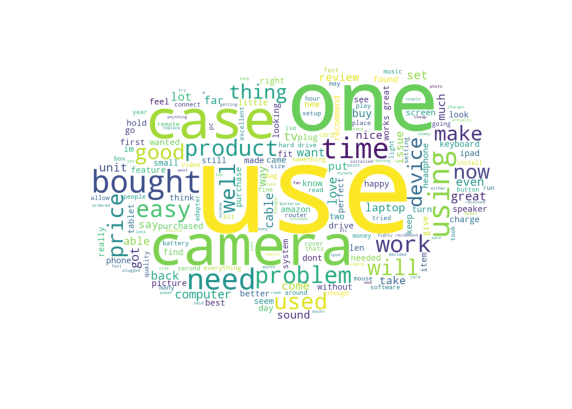

In [55]:
wc(dfsent["reviewText"],'white')

In [56]:
positive=df[df["sentiment"]=="positive"]["reviewText"]
neutral=df[df["sentiment"]=="neutral"]["reviewText"]
negative=df[df["sentiment"]=="negative"]["reviewText"]

In [57]:
#wc(positive,'white') # my ram is always crashing i can't get the wc's to load

In [58]:
#wc(neutral,'black')

In [59]:
#wc(negative,'red')

### Sentiment Analysis

In [60]:
from textblob import TextBlob

In [61]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [62]:
df2=df[["reviewText"]]

In [63]:
df2.head()

,reviewText
0,i am extremely impressed with this power pack ...
1,i bought these on a flight from australia to t...
2,i live with the buds in my ear and a protectiv...
3,ive been using this for a long while now i use...
4,the product for its price does its job have no...


In [64]:
df2["sentiment"]=df2["reviewText"].apply(detect_sentiment)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df2.head()

,reviewText,sentiment
0,i am extremely impressed with this power pack ...,0.342732
1,i bought these on a flight from australia to t...,0.411667
2,i live with the buds in my ear and a protectiv...,0.214026
3,ive been using this for a long while now i use...,0.125000
4,the product for its price does its job have no...,0.000000


In [66]:
df2.sentiment.value_counts()

 0.000000    9767
 0.500000    4685
 0.250000    2787
 0.800000    2784
 0.400000    2632
             ... 
 0.077260       1
 0.078553       1
-0.000573       1
 0.219681       1
 0.182959       1
Name: sentiment, Length: 143404, dtype: int64

In [67]:
#wc(df2.reviewText,'white')

In [68]:
# 1 positive
# 2 negative
# 0 neutral
def sentiment2(sent):
    if sent<-0.02: #0.02:limitin tanimi bu
        return 2
    elif sent>0.02:
        return 1
    else:
        return 0
    #returnlara yazi da yazabiliriz mesela "pozitif" vb.
    
#0 ve 0'in epsilon komsulugunda olan tam 0 degil ama 0 yakin ise, 0 kabul ediyoruz

In [69]:
df2["sent"]=df2["sentiment"].apply(sentiment2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df2.head()

,reviewText,sentiment,sent
0,i am extremely impressed with this power pack ...,0.342732,1
1,i bought these on a flight from australia to t...,0.411667,1
2,i live with the buds in my ear and a protectiv...,0.214026,1
3,ive been using this for a long while now i use...,0.125000,1
4,the product for its price does its job have no...,0.000000,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


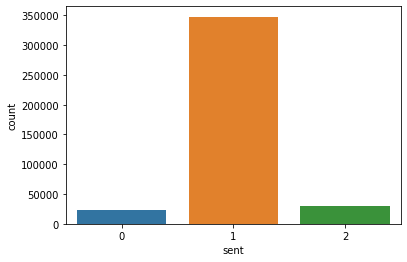

In [71]:
sns.countplot(df2.sent);

In [72]:
df2.sent.value_counts()

1    347710
2     29849
0     22441
Name: sent, dtype: int64

In [73]:
#347710 positive, 29849 negative, 22441 neutral comments

In [75]:
x=df2.reviewText
y=df2.sent

In [76]:
vect=CountVectorizer(stop_words="english")

In [77]:
x=vect.fit_transform(x)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [79]:
tahmin=mb.fit(x_train,y_train).predict(x_test)
#tahmin2=d.fit(x_train,y_train).predict(x_test)
#tahmin3=r.fit(x_train,y_train).predict(x_test)
#tahmin4=gb.fit(x_train,y_train).predict(x_test)
#tahmin5=k.fit(x_train,y_train).predict(x_test)

In [80]:
accuracy_score(tahmin,y_test) #MB

0.8660333333333333

In [81]:
tahmin2=d.fit(x_train,y_train).predict(x_test) # this code needed more than 1 hout to load

In [84]:
accuracy_score(tahmin2,y_test) #DecTree

0.8698166666666667

In [83]:
positive=df2[df2["sent"]==1]["reviewText"]
neutral=df2[df2["sent"]==0]["reviewText"]
negative=df2[df2["sent"]==2]["reviewText"]

In [ ]:
#wc(positive,'white')

In [ ]:
#wc(neutral,'black')

In [ ]:
#wc(negative,'red')

In [ ]:
# because of low RAM I couldn't run all the codes even though i waited a long time for each of them

### NER - Named-Entity Recognition 
NER attempts to extract words that categorized into proper names and even numerical entities

In [3]:
#pip install -U spacy

In [87]:
# for natural language processing: named entity recognition
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

from collections import defaultdict

I had to restart because my RAM crashed again

In [88]:
df=df.sample(40)

In [89]:
df.reset_index(drop=True,inplace=True) # reset our index after taking the samples

In [90]:
#text processing
df["reviewText"]=df["reviewText"].str.lower() # kücük harfe cevirdik
df["reviewText"]=df["reviewText"].str.replace('[^\w\s]','') # noktalama isaretlerini kaldirdik
df["reviewText"]=df["reviewText"].str.replace('\d+','') # rakamlari kaldirdik
df["reviewText"]=df["reviewText"].str.replace('\n',' ').replace('\r',' ') # enter ve return'lari kaldirdik

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [91]:
#nlp.max_length = 2430079
#ValueError: [E088] Text of length 2430079 exceeds maximum of 1000000: bu hataya binaen nlp max leng 

In [92]:
# create tokens that will serve as input for spaCy.
# create a variable tokens that contains all the words in 'reviewText'
tokens = nlp(''.join(str(df.reviewText.tolist())))
#RAM crashed again even though I started over from just reading the df and spacy, so I dropped from 400k to 40k sample values, then 4k because it crashed, after 400 I tried 40 to just test how NER is done

In [93]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2V1J3JT5OOZFO,B00DQZSIW8,Dragonwort Castle,"[0, 0]",perfect fit and looks and feels nice but does ...,3,"Perfect fit and looks and feels nice, no auto ...",1404172800,"07 1, 2014"
1,A3PVI8NJSB0NOB,B009QMZ7SS,"Stephen S. Osborn ""spendthrift""","[1, 2]",these pads are adequate but they bring down wh...,3,There is a better option than these.,1398729600,"04 29, 2014"
2,A3JU16JTNLVK1J,B000Y16TY6,Tony,"[0, 0]",i am a photographer and use this card in my ca...,5,Reliable,1372118400,"06 25, 2013"
3,A2830FG65LOK6S,B000KO0GY6,Stacy Burns,"[0, 0]",i bought this about years ago i have needed a...,5,New favorite gadget,1359936000,"02 4, 2013"
4,A3B6UM8QZVGXUH,B007UMLEWO,Dee,"[0, 0]",i didnt like the material i found it to be qui...,3,Less than what I expected,1394496000,"03 11, 2014"


extract entities - for now most common entities

In [94]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(30)

[('one', 11),
 ('sony', 7),
 ('two', 5),
 ('first', 4),
 ('about  hours', 3),
 ('over  years', 2),
 ('next year', 2),
 ('years', 2),
 ('half', 2),
 ('usb', 2),
 ('usado', 2),
 ('jvc harx', 1),
 ('this day', 1),
 ('this about  years ago', 1),
 ('about  months', 1),
 ('about a year and a half', 1),
 ('a few years', 1),
 ('mosaic', 1),
 ("the last few years'", 1),
 ('nextyears ultrabooks', 1),
 ('gen ultrabooks', 1),
 ('at least  hours', 1),
 ('every day', 1),
 ('samsung phillips', 1),
 ('earlier this month', 1),
 ('four to five', 1),
 ('netflix pandora', 1),
 ('last year', 1),
 ('a month', 1),
 ('xm  ', 1)]

Extracting Named-Entities - extract the entities based on their categories

To start, we’ll extract people (real and fictional) using the PERSON type.

In [95]:
person_list = []

for ent in tokens.ents: #loop through token entities
  if ent.label_ == 'PERSON': #if entitiy label is equal to person type
    person_list.append(ent.text)

#we want to know how many person types appear in the tokens        
person_counts = Counter(person_list).most_common(20) #top 20 common entities for this type
df_person = pd.DataFrame(person_counts, columns =['reviewText', 'count'])

In [96]:
df_person.head() # doesn't really look like persons, but I don't know why it recognized them as such

,reviewText,count
0,jvc harx,1
1,nextyears ultrabooks,1
2,gen ultrabooks,1
3,antenna something,1
4,multiline display,1


repeat the same pattern for the NORP type which recognizes nationalities, religious and political groups.

In [97]:
norp_list = []
for ent in tokens.ents:
  if ent.label_ == 'NORP':
      norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['reviewText', 'count'])


In [98]:
df_norp.head()

,reviewText,count
0,chinese,1


PRDOUCT: Objects, vehicles, foods, etc.

In [99]:
prod_list = []
for ent in tokens.ents:
  if ent.label_ == 'PRODUCT':
      prod_list.append(ent.text)
        
prod_counts = Counter(prod_list).most_common(20)
df_prod = pd.DataFrame(prod_counts, columns =['reviewText', 'count'])


In [100]:
df_prod.head()

,reviewText,count
0,samsung phillips,1


In [101]:
event_list = []
for ent in tokens.ents:
  if ent.label_ == 'EVENT':
      event_list.append(ent.text)
        
event_counts = Counter(event_list).most_common(20)
df_event = pd.DataFrame(event_counts, columns =['reviewText', 'count'])

In [102]:
df_event.head()

,reviewText,count


In [103]:
#countries, cities, states
gpe_list = []
for ent in tokens.ents:
  if ent.label_ == 'GPE':
      gpe_list.append(ent.text)
        
gpe_counts = Counter(gpe_list).most_common(20)
df_gpe = pd.DataFrame(gpe_counts, columns =['reviewText', 'count'])

In [104]:
df_gpe.head() #also not really countries or cities.. 

,reviewText,count
0,usado,2
1,modelsas,1
2,funciona,1
3,los flash,1
4,las pilas el,1


In [105]:
org_list = []
for ent in tokens.ents:
  if ent.label_ == 'ORG':
      org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['reviewText', 'count'])

In [106]:
df_org.head()

,reviewText,count
0,sony,7
1,usb,2
2,netflix pandora,1
3,xm,1
4,lateri,1


In [107]:
loc_list = []
for ent in tokens.ents:
  if ent.label_ == 'LOC':
      loc_list.append(ent.text)
        
loc_counts = Counter(loc_list).most_common(20)
df_loc = pd.DataFrame(loc_counts, columns =['reviewText', 'count'])

In [108]:
df_loc.head()

,reviewText,count


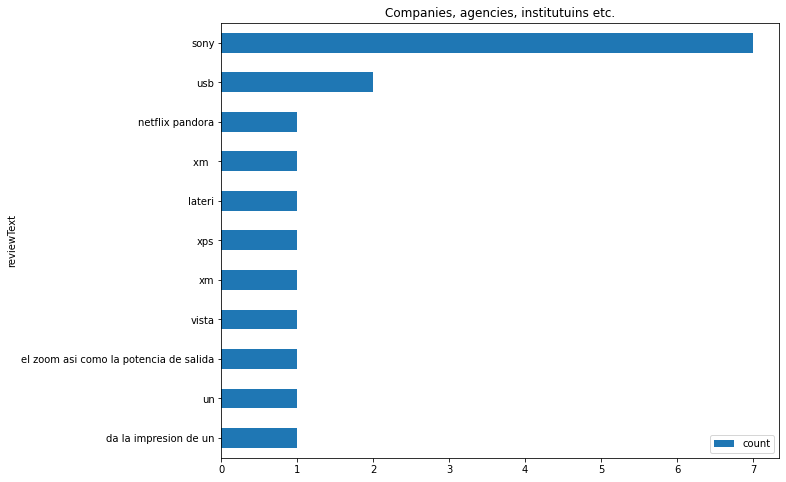

In [109]:
df_org.plot.barh(x='reviewText', y='count', title="Companies, agencies, institutuins etc.", figsize=(10,8)).invert_yaxis()

In [114]:
#ner = spacy.load("en")

ner = spacy.load("en_core_web_sm")
ner_test = ner(df["reviewText"][5])

ner_dict = defaultdict(list)
for entity in ner_test.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

ORG:
[sony, sony, sony, sony]

DATE:
[a few years, the last few years]

ORDINAL:
[first]

CARDINAL:
[mosaic, one]



use displaCy to visualize the tags in the review.

In [115]:
from spacy import displacy

displacy.render(ner_test, style="ent", jupyter=True)

Dependency Tree

In [116]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in df["reviewText"][5].split(".")[0:3]:
    ner_displacy(sentence)

In [119]:
doc = nlp(df["reviewText"][5])

In [122]:
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])
df.head()

,text,type,lemma
0,sony,ORG,sony
1,a few years,DATE,a few year
2,sony,ORG,sony
3,sony,ORG,sony
4,first,ORDINAL,first


In [123]:
df[df.type == 'DATE'].lemma.value_counts() # check which Date entities are the most common

a few year           1
the last few year    1
Name: lemma, dtype: int64

In [124]:
df[df.type == 'ORG'].lemma.value_counts() # check which Org entities are the most common

sony    4
Name: lemma, dtype: int64

Because I had so much RAM crashing errors and lost much time I tried NER with df.sample(40) only and therefore the results are not meaningfull, but helped me to understand what NER is and what it has to offer.